In [2]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import pickle
import matplotlib.pyplot as plt

In [3]:
# Load the training and test datasets
train_data = pd.read_csv('/home/mukesh/Infernape/ml_scratch/data/train.csv')
test_data = pd.read_csv('/home/mukesh/Infernape/ml_scratch/data/test.csv')

# Remove rows with missing values
train_data = train_data.dropna()
test_data = test_data.dropna()

In [4]:
train_data.head()


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
train_data = train_data.dropna()


In [6]:
train_data['x'] = (train_data['x'] - train_data['x'].mean()) / train_data['x'].std()
train_data['y'] = (train_data['y'] - train_data['y'].mean()) / train_data['y'].std()


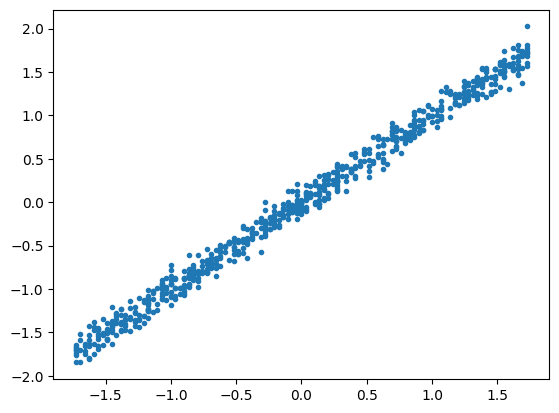

In [7]:
plt.plot(train_data["x"], train_data["y"], ".")

In [8]:
def Loss(m,b, data):
    tot_los = 0

    for i in range(0, len(data)):

        x = data.iloc[i].x
        y = data.iloc[i].y
        tot_los += (y - (m*x+b))**2
    tot_los = tot_los/len(data)
    return tot_los

In [9]:
x = train_data.iloc[0].x
x

np.float64(-0.8984528156834392)

In [10]:
def gradient_descent(m_pres , b_pres, data, lr):

    m_grad = 0
    b_grad = 0

    n= len(data)

    for i in range(0, len(data)):

        x = data.iloc[i].x
        y = data.iloc[i].y

        m_grad += -(2/n)*x*(y-(m_pres*x +b_pres))
        b_grad += -(2/n)*(y-(m_pres*x +b_pres))

    m = m_pres - m_grad*lr
    b = b_pres -b_grad*lr

    return m,b


In [11]:
m=0
b=0
n= len(train_data)

epoch =1000
for i in range(epoch):
    if (i%50 ==0):
        print(i)
    m,b = gradient_descent(m,b,train_data,lr= 0.01)

print(m,b)


0


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
0.9953399059965007 -2.6227321423333703e-16


[]

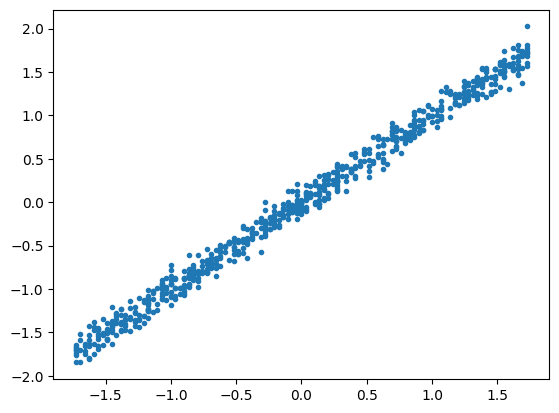

In [12]:
plt.plot(train_data["x"], train_data["y"], ".")
plt.plot()

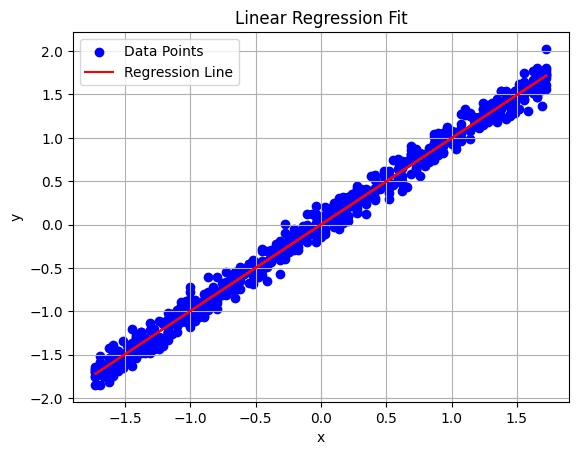

In [13]:
import matplotlib.pyplot as plt

# Extract x and y from train_data
x = train_data['x']
y = train_data['y']

# Predicted y values using the learned model
y_pred = m * x + b

# Plot original data
plt.scatter(x, y, color='blue', label='Data Points')

# Plot regression line
plt.plot(x, y_pred, color='red', label='Regression Line')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)

plt.show()


In [16]:
# Predict using the regression model
train_data['y_pred'] = m * train_data['x'] + b


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

# True and predicted values
y_true = train_data['y']
y_pred = train_data['y_pred']

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")


RMSE: 0.09635956396736735
